# Problem Set 7 Solutions

## 18.330 Intro to Numerical Analysis (MIT, Spring 2019) 

Henrik Ronellenfitsch


In [1]:
using LinearAlgebra
using Statistics
using Polynomials

using PyPlot
PyPlot.svg(true);

┌ Info: Recompiling stale cache file /Users/boyasong/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


## Problem 1. Computing $\pi$ using Monte Carlo Integration (25 points)

### (a)

$\pi$ is the area of the unit circle $B_2 = \{(x,y) \mid x^2 + y^2 \leq 1\}$. Clearly 
the area $\hat B_2$ is $\pi/4$ because $\hat B_2$ is just the upper right quarter of the circle.

### (b)

In [2]:
function integrate_mc(f, a, b, N)
    """ Integrate f over the hypercube [a[1], b[1]] × ... × [a[D], b[D]]
    with N samples using Monte Carlo integration.
    """
    D = length(a)
    
    S = 0.0
    V = prod(b .- a)
    for i=1:N
        # sample a point uniformly from [0, 1]×...×[0,1]
        x = rand(D)
        
        # scale to [a[1], b[1]] × ... × [a[D], b[D]]
        x = a .+ (b .- a).*x
        
        S += f(x)
    end
    
    return S.* (V/N)
end

integrate_mc (generic function with 1 method)

In [3]:
# Characteristic function of B_hat_2
χ_Ball(x) = norm(x) < 1.0 ? 1.0 : 0.0

χ_Ball (generic function with 1 method)

In [4]:
# compute π/4 with 10^7 samples
π_estimate = 4integrate_mc(χ_Ball, [0.0, 0.0], [1.0, 1.0], 1e7)

3.1410372

In [5]:
# compute number of correct digits
correct_digits(estimate) = -ceil(log10(abs(π - estimate)/π))

correct_digits(π_estimate)

3.0

In [6]:
Ns = 10.0.^(2:7)
N_samples = 100

mean_and_std(x) = mean(x), std(x)

means_and_stds = [mean_and_std(correct_digits.([4integrate_mc(χ_Ball, [0.0, 0.0], [1.0, 1.0], Int64(N)) for i=1:N_samples]))
    for N in Ns]

means, stds = collect(zip(means_and_stds...))

2-element Array{NTuple{6,Float64},1}:
 (1.18, 1.57, 2.2, 2.5, 3.03, 3.51)                                                                                       
 (0.5389852043470679, 0.6072790781740127, 0.5860327153276884, 0.5595813731096785, 0.38807996676723805, 0.6112580172368814)

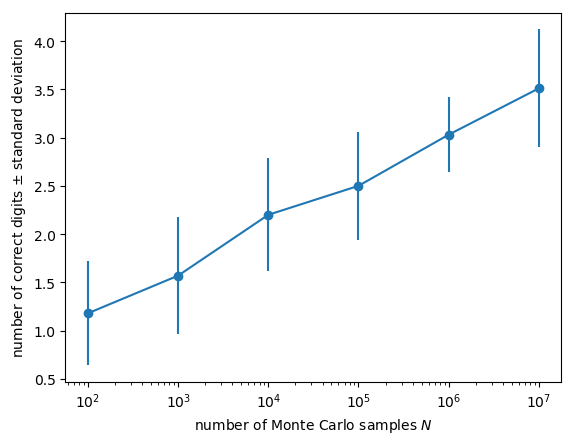

PyObject Text(28.00000000000002, 0.5, 'number of correct digits $\\pm$ standard deviation')

In [7]:
fig, ax = subplots()

ax.errorbar(Ns, means, yerr=stds, marker="o")
ax.set_xscale("log")

ax.set_xlabel(L"number of Monte Carlo samples $N$")
ax.set_ylabel(L"number of correct digits $\pm$ standard deviation")

## Problem 2. Recursive Stratified Sampling.

### (a)
\begin{align}
\sigma^2(\langle f\rangle') &= \langle (\langle f\rangle')^2 \rangle - \langle \langle f \rangle' \rangle^2 \\
    &= \langle \frac{1}{4} (\langle f\rangle_A + \langle f\rangle_B)^2\rangle - \langle f\rangle^2 \\
    &= \frac{1}{4} \langle \langle f\rangle_A^2 + 2\langle f\rangle_A\langle f\rangle_B + \langle f\rangle_B^2   \rangle - \langle f\rangle^2 \\
    &= \frac{1}{4} \langle \langle f\rangle_A^2 \rangle + \frac{1}{4} \langle \langle f\rangle_B^2 \rangle -
    \frac{1}{2}\langle f\rangle^2 \\
    &= \frac{1}{4} (\langle \langle f\rangle_A^2 \rangle - \langle f\rangle^2) + \frac{1}{4} (\langle \langle f\rangle_B^2 \rangle - \langle f\rangle^2) \\
    &= \frac{1}{4} \sigma^2(\langle f\rangle_A) + \frac{1}{4} \sigma^2(\langle f\rangle_B) \\
    &= \frac{1}{2N} \sigma_A^2(f) + \frac{1}{2N} \sigma_B^2(f),
\end{align}

where in the fourth line we used the fact that the subregions $A$ and $B$ are independent and
in the last line we used $\sigma^2(\langle f\rangle_{A,B}) = \sigma_{A,B}^2(f)/N_{A,B}$.

### (b)
We first use the fact that
\begin{align}
\langle f \rangle^2 &= \left(\frac{1}{N} \sum_{i\in A} f_i + \frac{1}{N}\sum_{j\in B} f_j \right)^2 \\
    &= \frac{1}{4} \left( \frac{2}{N}  \sum_{i\in A} f_i \right)^2 + \frac{1}{4} \left( \frac{2}{N}  \sum_{j\in B} f_j \right)^2 + \frac{1}{2} \left( \frac{2}{N}  \sum_{i\in A} f_i \right)  \left( \frac{2}{N}  \sum_{j\in B} f_j \right) \\
    &= \frac{1}{4} \langle f \rangle_A^2 + \frac{1}{4} \langle f \rangle_B^2
    + \frac{1}{2} \langle f \rangle_A \langle f \rangle_B.
\end{align}

with this we rewrite
\begin{align}
\frac{1}{2} \sigma_A^2(f) + \frac{1}{2} \sigma_B^2(f) &= 
    \frac{1}{2} \left( \frac{2}{N} \sum_{i\in A} f_i^2 \right) +   \frac{1}{2} \left( \frac{2}{N} \sum_{j\in B} f_j^2 \right) - \frac{1}{2} \left( \frac{2}{N} \sum_{i\in A} f_i \right)^2 - \frac{1}{2} \left( \frac{2}{N} \sum_{j\in B} f_j \right)^2 \\
    &= \frac{1}{N}\sum_i f_i^2 - \frac{1}{2} \langle f \rangle_A^2 - \frac{1}{2} \langle f \rangle_B^2 \\
    &= \langle f^2\rangle - \frac{1}{2} \langle f \rangle_A^2 - \frac{1}{2} \langle f \rangle_B^2 \\
    &= \langle f^2\rangle - \langle f \rangle^2 + \langle f \rangle^2 - \frac{1}{2} \langle f \rangle_A^2 - \frac{1}{2} \langle f \rangle_B^2 \\
    &= \sigma^2(f) + \frac{1}{4} \langle f \rangle_A^2 + \frac{1}{4} \langle f \rangle_B^2
    + \frac{1}{2} \langle f \rangle_A \langle f \rangle_B - \frac{1}{2} \langle f \rangle_A^2 - \frac{1}{2} \langle f \rangle_B^2 \\
    &= \sigma^2(f) - \frac{1}{4} \left( \langle f\rangle_A - \langle f\rangle_B \right)^2 \\
    \Rightarrow \sigma^2(f) &= \frac{1}{2} \sigma_A^2(f) + \frac{1}{2} \sigma_B^2(f) + \frac{1}{4} \left( \langle f\rangle_A - \langle f\rangle_B \right)^2.
\end{align}

### (c)
Plug the result of (b) into that of (a) and find
$$
\sigma^2(\langle f\rangle') = \frac{1}{N} \sigma^2(f) -\frac{1}{4N} \left( \langle f\rangle_A - \langle f\rangle_B \right)^2 = \sigma^2(\langle f\rangle) - \frac{1}{4N} \left( \langle f\rangle_A - \langle f\rangle_B \right)^2.
$$

So the variance of stratified sampling is always smaller than that of simple MC, and it is equal
precisely when the means on the two subvolumes are identical.

### (d)
From part (a) we use
\begin{align}
\sigma^2(\langle f\rangle')
    &= \frac{1}{4} \sigma^2(\langle f\rangle_A) + \frac{1}{4} \sigma^2(\langle f\rangle_B),
\end{align}

which is still true because the sub-volumes are independent. Now simply use the formula
relating variance to variance of the mean,
\begin{align}
\sigma^2(\langle f\rangle')
    &= \frac{1}{4} \sigma^2(\langle f\rangle_A) + \frac{1}{4} \sigma^2(\langle f\rangle_B) \\
    &= \frac{1}{4}\left( \frac{\sigma^2_A(f)}{N_A} + \frac{\sigma^2_B(f)}{N - N_A} \right).
\end{align}

Next take the derivative with respect to $N_A$ and set to zero,

\begin{align}
 0 &= \frac{d}{dN_A} \sigma^2(\langle f\rangle') = \frac{1}{4}\left( -\frac{\sigma^2_A(f)}{N_A^2} + \frac{\sigma^2_B(f)}{(N - N_A)^2} \right) \\
 \Rightarrow (N - N_A)^2 \sigma^2_A(f) &= N_A^2 \sigma^2_B(f) \\
 \Rightarrow (N - N_A) \sigma_A(f) &= N_A \sigma_B(f) \\
 \Rightarrow N_A (\sigma_A(f) + \sigma_B(f)) &= N \sigma_A(f) \\
 \Rightarrow \frac{N_A}{N} &= \frac{\sigma_A(f)}{\sigma_A(f) + \sigma_B(f)}.
\end{align}


Finally, we plug this back into the formula for the variance,
\begin{align}
\sigma^2(\langle f\rangle') &= \frac{1}{4N}
\left(\sigma_A(f) (\sigma_A(f) + \sigma_B(f)) + \frac{\sigma^2_B(f)}{1 - \frac{\sigma_A(f)}{\sigma_A(f) + \sigma_B(f)}}
\right) \\
    &= \frac{1}{4N} \left(
    \sigma_A(f)^2 + 2 \sigma_A(f)\sigma_B(f) + \sigma_B(f)^2
    \right) \\
    &= \frac{(\sigma_A(f) + \sigma_B(f))^2}{4N}.
\end{align}

## Problem 3. Implementing Recursive Stratified Sampling.

In [8]:
# This is the function from class. We use it as the base case
function estimate_mc(f, a, b, N)
    """ Estimate ⟨f⟩ over the hypercube [a[1], b[1]] × ... × [a[D], b[D]]
    with N samples using Monte Carlo integration.
    Return only the sample mean, not the mean/volume
    """
    if N == 0
        return 0.0, 0.0
    end
    
    D = length(a)
    
    # uniform sample points on the given hypervolume
    xs = [a .+ (b .- a).*rand(D) for i=1:N]
    
    # evaluate f on the sample points
    fx = f.(xs)
    
    if N > 1
        return mean(fx), std(fx)/sqrt(N)
    else
        # can't use the corrected formula
        return mean(fx), 0.0
    end
end

estimate_mc (generic function with 1 method)

In [9]:
function estimate_rss(f, a, b, N, p; N_base=100, α=1.0)
    """ Estimate ⟨f⟩ over the hypercube [a[1], b[1]] × ... × [a[D], b[D]]
    with N samples using RSS Monte Carlo sampling.
    We sample p N samples to find the optimal subdivision, and
    (1-p)N to compute the means.
    
    The parameter α controls the empirical variance maximum and
    allocation of samples according to
    
    N_A/N = σ_A^{2/(1+α)}/( σ_A^{2/(1+α)} + σ_B^{2/(1+α)} )
    
    and σ(⟨f⟩) ∼ ( σ_A^{2/(1+α)} + σ_B^{2/(1+α)} )^{(1 + α)/2}.
    
    For α=1 the RSS version from the PSET is obtained, for
    α=2 we get the recommended version from the paper.
    """
    
    # Base case: Use simple Monte Carlo
    if N <= N_base
        return estimate_mc(f, a, b, N)
    end
    
    # Enough samples, we use RSS.
    
    N_test = Int64(trunc(p*N))
    N_rest = N - N_test
    
    D = length(a)

    # sample using N_test samples
    # uniform sample points on the given hypervolume
    xs = [a .+ (b .- a).*rand(D) for i=1:N_test]
    
    # evaluate f on the sample points
    fx = f.(xs)
    
    # subdivide along each dimension and save the sum of variances
    # σ_A + σ_B
    sum_stds = []
    std_fracs = []
    for i=1:D
        # find all sample points where a <= x_i <= 0.5*(a+b)
        # and  0.5*(a+b) < x_i < b
        left = [j for (j, x) in enumerate(xs) if x[i] <= 0.5*(a[i] + b[i])]
        right = [j for (j, x) in enumerate(xs) if x[i] > 0.5*(a[i] + b[i])]
                                
        fx_left = fx[left]
        fx_right = fx[right]
                                
        # sum of the variances is our best guess according to Problem 2 (d)
        σ_A = std(fx_left)
        σ_B = std(fx_right)
        
        # Tie breaking rule in case both estimates are zero
        if σ_A > 0 && σ_B > 0
            push!(sum_stds, (σ_A^(2.0/(1.0 + α)) + σ_B^(2.0/(1.0 + α)))^((1.0 + α)/2.0))
            push!(std_fracs, σ_A^(2.0/(1.0 + α))/(σ_A^(2.0/(1.0 + α)) + σ_B^(2.0/(1.0 + α))))
        else
            push!(sum_stds, 0.0)
            push!(std_fracs, 0.5)
        end
    end
                           
    # find optimal dimension to subdivide
    i_min = argmin(sum_stds)
    ϕ = std_fracs[i_min]
                                                            
    # construct sub-regions A and B
    a_A = copy(a)
    b_A = copy(b)
    a_B = copy(a)
    b_B = copy(b)
                            
    b_A[i_min] = 0.5*(a[i_min] + b[i_min])           
    a_B[i_min] = 0.5*(a[i_min] + b[i_min])
                            
    # choose allocation of sample points to A and B
    # using result from Problem 2 (d)
    N_A = Int64(trunc(N_rest*ϕ))
    N_B = N_rest - N_A
                            
    # Recursive estimation
    f_A, std_A = estimate_rss(f, a_A, b_A, N_A, p; N_base=N_base, α=α)
    f_B, std_B = estimate_rss(f, a_B, b_B, N_B, p; N_base=N_base, α=α)
                            
    f_mean = (f_A + f_B)/2.0
    f_std = 0.5*sqrt(std_A^2.0 + std_B^2.0)
                            
    return f_mean, f_std
end

estimate_rss (generic function with 1 method)

In [10]:
χ_Ball(x) = norm(x) < 1.0 ? 1.0 : 0.0

χ_Ball (generic function with 1 method)

In [11]:
a = [0.0, 0.0]
b = [1.1, 1.05]

V = prod(b .- a)
f_mean, f_std = estimate_rss(χ_Ball, a, b, 1e5, 0.1; α=1.0)

V*f_mean, V*f_std

(0.7864737138926678, 0.0005730309572287746)

In [12]:
Ns = 10.0.^(2:6)

# comparing RSS to simple Monte Carlo by 100 runs and taking std of the result
N_runs = 100

# Standard RSS
stds_rss_1 = [std([estimate_rss(χ_Ball, a, b, N, 0.01; α=1.0)[1] for i=1:N_runs]) for N in Ns]

# Empirical RSS with α=2
stds_rss_2 = [std([estimate_rss(χ_Ball, a, b, N, 0.01; α=2.0)[1] for i=1:N_runs]) for N in Ns]

# Simple MC
stds_mc = [std([estimate_mc(χ_Ball, a, b, N)[1] for i=1:N_runs]) for N in Ns]

5-element Array{Float64,1}:
 0.0407727131966238    
 0.014042572356368249  
 0.004416051986957933  
 0.0013778246505549156 
 0.00046381939568994525

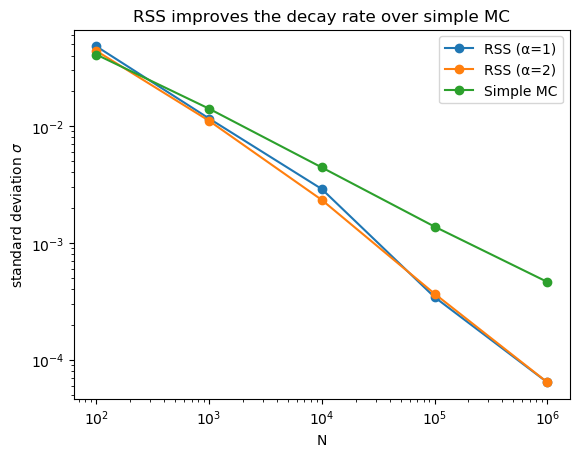

PyObject <matplotlib.legend.Legend object at 0x138586828>

In [13]:
figure()

loglog(Ns, stds_rss_1, "o-", label="RSS (α=1)")
loglog(Ns, stds_rss_2, "o-", label="RSS (α=2)")
loglog(Ns, stds_mc, "o-", label="Simple MC")

xlabel("N")
ylabel(L"standard deviation $\sigma$")
title("RSS improves the decay rate over simple MC")
legend()

In [14]:
# Let's fit the slopes of our estimates

# simple MC
polyfit(log10.(Ns), log10.(stds_mc), 1)

Poly(-0.39980368355733625 - 0.4896294133044595*x)

In [15]:
# RSS with α=1
polyfit(log10.(Ns), log10.(stds_rss_1), 1)

Poly(0.21901221569393234 - 0.7273135165382236*x)

In [16]:
# RSS with α=2: Slight improvement, but not ∼ N^{-1}
polyfit(log10.(Ns), log10.(stds_rss_2), 1)

Poly(0.14353392328484746 - 0.7145234258512279*x)

## Problem 4. Properties of the Fourier Transform.

### (a)
$$
FT[\alpha f(t)](\omega) = \alpha \hat f(\omega)
$$

### (b)

$$
FT[f(\alpha t)](\omega) = \frac{1}{2\pi} \int_{-\infty}^\infty e^{-i\omega t} f(\alpha t)\,dt.
$$
Substitute $t' = \alpha t$ with $dt = \frac{1}{\alpha} dt'$. If $\alpha < 0$, reverse the integration
bounds to pick up a minus sign and obtain

$$
FT[f(\alpha t)](\omega) = \frac{1}{|\alpha|} \hat f\left(\frac{\omega}{\alpha}\right).
$$

### (c)

$$
FT[f(t + t_0)](\omega) = \frac{1}{2\pi} \int_{-\infty}^\infty e^{-i\omega t} f(t + t_0)\,dt.
$$

Substitute $t' = t + t_0$ with $dt' = dt$. The integration bounds remain unaffected.
We obtain

$$
FT[f(t + t_0)](\omega) = \frac{1}{2\pi} \int_{-\infty}^\infty e^{-i\omega (t' - t_0)} f(t')\,dt' = e^{i\omega t_0}
\frac{1}{2\pi} \int_{-\infty}^\infty e^{-i\omega t' } f(t')\,dt' = e^{i\omega t_0} \hat f(\omega).
$$

### (d)

$$
FT[f(t) g(t)](\omega) = \frac{1}{2\pi} \int_{-\infty}^\infty e^{-i\omega t} f(t) g(t)\,dt.
$$

Plug in the inverse FTs
$$
f(t) = \int_{-\infty}^\infty e^{i\omega t} \hat f(\omega)\, d\omega, \qquad 
g(t) = \int_{-\infty}^\infty e^{i\omega t} \hat g(\omega)\, d\omega
$$
and find
$$
FT[f(t) g(t)](\omega) = \frac{1}{2\pi} \int_{-\infty}^\infty dt \int_{-\infty}^\infty d\omega'
\int_{-\infty}^\infty d\omega'' e^{-i\omega t + i\omega' t + i \omega'' t}
\hat f(\omega') \hat g(\omega'') 
= \int_{-\infty}^\infty d\omega'
\int_{-\infty}^\infty d\omega'' \frac{1}{2\pi} \int_{-\infty}^\infty e^{i(-\omega  + \omega'  + \omega'') t} dt
\hat f(\omega') \hat g(\omega'').
$$

We recognize the FT of the Dirac $\delta$ function,
$$
\frac{1}{2\pi} \int_{-\infty}^\infty e^{i(-\omega  + \omega'  + \omega'') t} dt = \delta(-\omega  + \omega'  + \omega'').
$$

Plug this in,
$$
FT[f(t) g(t)](\omega) 
= \int_{-\infty}^\infty d\omega'
\int_{-\infty}^\infty d\omega'' \delta(-\omega  + \omega'  + \omega'')
\hat f(\omega') \hat g(\omega'') = \int_{-\infty}^\infty d\omega' \, \hat f(\omega') \, \hat g(\omega - \omega').
$$

This type of integral is called a convolution, and it is sometimes written as

$$
(\hat f * \hat g)(\omega) = \int_{-\infty}^\infty d\omega' \, \hat f(\omega') \, \hat g(\omega - \omega').
$$

Thus, the FT converts products into convolutions (and vice-versa!).